## > Gerando data sensível falsa.

In [48]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_treino.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_teste.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="dataset_cpf_list_mix.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_treino.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="apenas_dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)

### Imports de bibliotecas importantes

In [49]:
from __future__ import absolute_import, division, print_function, unicode_literals
#import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# clear_session() -> limpa o estado da antiga sessão.

## > Lendo CSV e criando dados de teste e treino com 3 colunas para o modelo.

### Lendo dados de treinamento

In [50]:
clear_session()
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_train = pd.read_csv("./dados_sensiveis_mix_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# # Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

print(X_train)

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_1752\1593972125.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Lendo dados de teste.

In [51]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

#print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

print(X_test)

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_1752\2461429639.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


                Coluna A          Coluna B             Coluna C  Classe
0             Caio Sales  4338960286895990         61 0186 3082       1
1    Sra. Clara Silveira  3575708029479091  +55 (081) 8085-4262       1
2            Diogo Cunha  2250213920610567         21 5979-7957       1
3         Pietro Pereira  5473615923423406      (084) 7681-8755       1
4            Maria Gomes     Android 5.0.1            Chargista       0
..                   ...               ...                  ...     ...
994      Bernardo Castro       Android 3.1      Perito criminal       0
995       Helena Almeida  2295591628111286         41 4577-5196       1
996  Enzo Gabriel Aragão  6500627849181641      (051) 7840 6156       1
997   Gabrielly da Cunha   180022558844045  +55 (051) 6128-1259       1
998        Stella Araújo  4907142878366588     +55 71 4365 5104       1

[999 rows x 4 columns]
    Coluna A Coluna B Coluna C  Classe
0          0        0        0       1
1          1        1        1    

### Criação de modelo utilizando ativador por tangente.

In [52]:
from keras import layers

clear_session()

print(X_train.shape[1])
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, activation='tanh'))
model.add(keras.layers.Dense(4, activation='tanh'))
model.add(keras.layers.Dense(1, activation='hard_sigmoid'))
# Configurando o modelo de treinamento.
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=[
    keras.metrics.TruePositives(name='true_positives'),
    keras.metrics.FalsePositives(name='false_positives'),
    keras.metrics.TrueNegatives(name='true_negatives'),
    keras.metrics.FalseNegatives(name='false_negatives'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    ]
  )
model.summary() # Mostra os paramestros disponíveis para treinar

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

In [53]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history, plot_pie
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

#Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=100,
#  verbose=2,
#)

#Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=225,
  verbose=True,
  validation_data=(X_test, y_test),
  batch_size=25,
  callbacks =[earlystopping]
)

Epoch 1/225
40/40 [==============================] - 3s 25ms/step - loss: 0.8960 - true_positives: 0.0000e+00 - false_positives: 30.0000 - true_negatives: 474.0000 - false_negatives: 495.0000 - accuracy: 0.4745 - precision: 0.0000e+00 - val_loss: 0.8690 - val_true_positives: 1.0000 - val_false_positives: 24.0000 - val_true_negatives: 452.0000 - val_false_negatives: 522.0000 - val_accuracy: 0.4535 - val_precision: 0.0400
Epoch 2/225
40/40 [==============================] - 0s 5ms/step - loss: 0.8024 - true_positives: 0.0000e+00 - false_positives: 28.0000 - true_negatives: 476.0000 - false_negatives: 495.0000 - accuracy: 0.4765 - precision: 0.0000e+00 - val_loss: 0.7780 - val_true_positives: 1.0000 - val_false_positives: 31.0000 - val_true_negatives: 445.0000 - val_false_negatives: 522.0000 - val_accuracy: 0.4464 - val_precision: 0.0312
Epoch 3/225
40/40 [==============================] - 0s 4ms/step - loss: 0.7294 - true_positives: 0.0000e+00 - false_positives: 43.0000 - true_negatives:

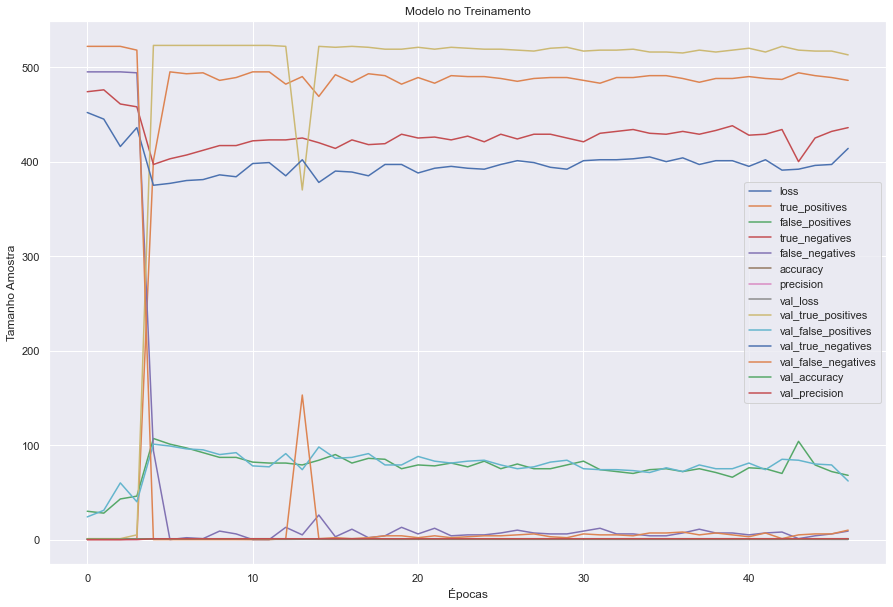

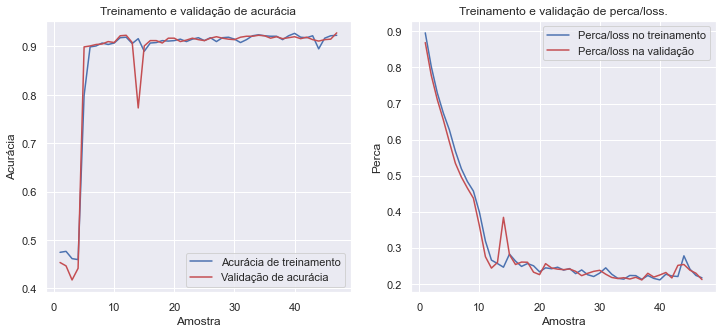

In [54]:
# Mostrando resultados do treinamento com dataset de train.
df = pd.DataFrame(history.history).plot(figsize=(15,10))
plot.xlabel('Épocas')
plot.ylabel('Tamanho Amostra')
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [55]:

loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
#loss, accuracy = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 4ms/step - loss: 0.2107 - true_positives: 515.0000 - false_positives: 72.0000 - true_negatives: 404.0000 - false_negatives: 8.0000 - accuracy: 0.9199 - precision: 0.8773
Acurácia no teste: 0.9199199080467224
Perca no teste: 0.21065273880958557


### Realizando previsão no dataset de teste.

In [56]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==============================] - 0s 1ms/step


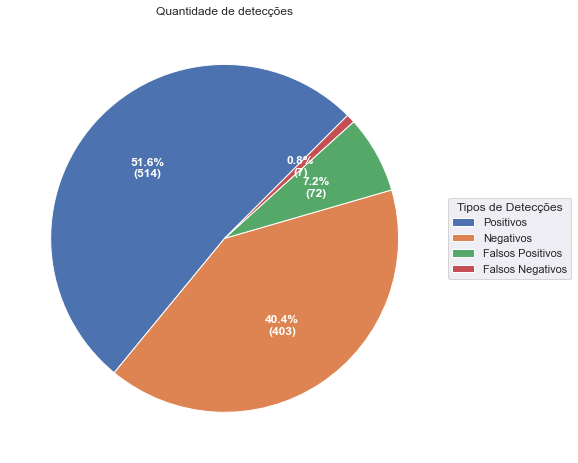

In [57]:
data = [tp, tn, fp, fn]
plot_pie(data)

In [58]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

#print(dataset)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_1752\2992950136.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [59]:
# Mostrando as previsões
for i in range(len(X_test)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, y_test={y_test[i]}")

X=[146 532 557] Previsão=[0.40281874], y_test=1
X=[199 118 454] Previsão=[0.49948943], y_test=1
X=[733 332 126] Previsão=[0.51019406], y_test=1
X=[290 361 475] Previsão=[0.5190098], y_test=1
X=[295 151 197] Previsão=[0.5213739], y_test=0
X=[150  37 143] Previsão=[0.5104259], y_test=1
X=[770 477  50] Previsão=[0.4972922], y_test=0
X=[898 293 416] Previsão=[0.4852743], y_test=0
X=[573 508 818] Previsão=[0.4747085], y_test=1
X=[818 538 712] Previsão=[0.4659289], y_test=0
X=[848 347  88] Previsão=[0.45931867], y_test=1
X=[591  78 493] Previsão=[0.45523885], y_test=0
X=[807 503 771] Previsão=[0.45395], y_test=1
X=[909 539 766] Previsão=[0.45557508], y_test=0
X=[839  32 223] Previsão=[0.46010408], y_test=1
X=[414 265 102] Previsão=[0.46742252], y_test=1
X=[834  52 432] Previsão=[0.4773431], y_test=1
X=[444 506 602] Previsão=[0.48963177], y_test=0
X=[ 87 518 786] Previsão=[0.50402576], y_test=0
X=[456 547 803] Previsão=[0.5202414], y_test=0
X=[180 516 650] Previsão=[0.53797966], y_test=0
X=[2

### Realizando uma previsão com um dataset com dados sensíveis misturados com dados não sensíveis.

In [60]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

print(dataset)

# Fazendo o pré processamento.
#le = preprocessing.LabelEncoder()
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_1752\3886828975.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


### Previsão

In [61]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(dataset) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==============================] - 0s 1ms/step


In [62]:
# Mostrando as previsões
for i in range(len(dataset)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, classe={classes[i]}")

X=[0 0 0] Previsão=[0.40281874], classe=0
X=[1 1 1] Previsão=[0.49948943], classe=1
X=[2 2 2] Previsão=[0.51019406], classe=1
X=[3 3 3] Previsão=[0.5190098], classe=1
X=[4 4 4] Previsão=[0.5213739], classe=1
X=[5 5 5] Previsão=[0.5104259], classe=1
X=[6 6 6] Previsão=[0.4972922], classe=1
X=[7 7 7] Previsão=[0.4852743], classe=1
X=[8 8 8] Previsão=[0.4747085], classe=0
X=[9 9 9] Previsão=[0.4659289], classe=0
X=[10 10 10] Previsão=[0.45931867], classe=1
X=[11 11 11] Previsão=[0.45523885], classe=1
X=[12 12 12] Previsão=[0.45395], classe=0
X=[13 13 13] Previsão=[0.45557508], classe=0
X=[14 14 14] Previsão=[0.46010408], classe=1
X=[15 15 15] Previsão=[0.46742252], classe=1
X=[16 16 16] Previsão=[0.4773431], classe=1
X=[17 17 17] Previsão=[0.48963177], classe=0
X=[18 18 18] Previsão=[0.50402576], classe=0
X=[19 19 19] Previsão=[0.5202414], classe=0
X=[20 20 20] Previsão=[0.53797966], classe=0
X=[21 21 21] Previsão=[0.55692875], classe=0
X=[22 22 22] Previsão=[0.5767684], classe=0
X=[23 22

### Análisando apenas as previsões feita pelo modelo.

### Detecção de outliers usando Desvio Padrão.

Como um padrão para quase todo dataset, pelo menos 90.7% dele esta entre três tipos de desvio padrão, com os outliers perto de 0.3% do tamanho do dataset.

Média dos valores: 
predict    0.496031
dtype: float32

Desvio de padrão dos valores: 
predict    0.431642
dtype: float32


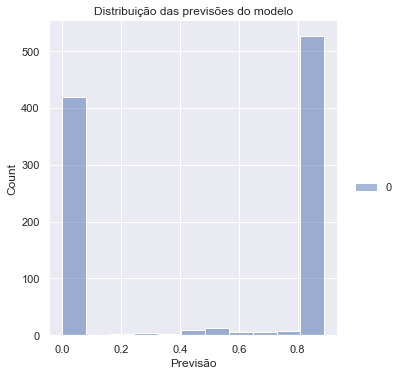

In [63]:

import seaborn as sns

df_predicted = pd.DataFrame(predict_x, columns=['predict'])

sns.set_theme()
sns.displot(data=predict_x).set(title="Distribuição das previsões do modelo", xlabel="Previsão")

print(f'Média dos valores: \n{df_predicted.mean()}')
print()
print(f'Desvio de padrão dos valores: \n{df_predicted.std()}')

### Utilizando o limite inferior: média(μ - 3 * σ) e o limite superior: média(μ + 3 * σ) para encontrar os outliers no database.

In [64]:
lower_limit = df_predicted.mean() - 3 * df_predicted.std()
upper_limit = df_predicted.mean() + 3 * df_predicted.std()

In [65]:
lower_limit

predict   -0.798895
dtype: float32

In [66]:
upper_limit

predict    1.790958
dtype: float32

In [67]:
df_scores_filtered=df_predicted[(df_predicted['predict'] > lower_limit['predict']) & (df_predicted['predict'] < upper_limit['predict'])]
df_scores_filtered

,predict
0,0.402819
1,0.499489
2,0.510194
3,0.519010
4,0.521374
...,...
994,0.884568
995,0.000000
996,0.884315
997,0.884986


### Utilizando Z-Score

In [68]:
df_predicted['z_score']=(df_predicted['predict'] - df_predicted['predict'].mean())/df_predicted['predict'].std()
df_predicted.head()

,predict,z_score
0,0.402819,-0.215949
1,0.499489,0.008011
2,0.510194,0.032811
3,0.519010,0.053235
4,0.521374,0.058712


In [69]:
df_scores_filtered= df_predicted[(df_predicted['z_score']>-3) & (df_predicted['z_score']<3)]
print(df_scores_filtered)

      predict   z_score
0    0.402819 -0.215949
1    0.499489  0.008011
2    0.510194  0.032811
3    0.519010  0.053235
4    0.521374  0.058712
..        ...       ...
994  0.884568  0.900135
995  0.000000 -1.149173
996  0.884315  0.899549
997  0.884986  0.901104
998  0.885579  0.902478

[999 rows x 2 columns]


### Utilizando IRQ para avaliar os predict

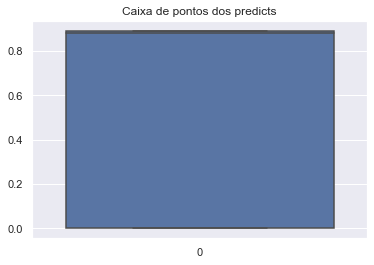

In [70]:
sns.boxplot(data=predict_x).set(title="Caixa de pontos dos predicts")
df_predicted = pd.DataFrame(predict_x, columns=['predict'])

In [71]:
df_predicted.describe()

,predict
count,999.000000
mean,0.496031
std,0.431642
min,0.000000
25%,0.000000
50%,0.880815
75%,0.890059
max,0.890072


In [72]:
IQR = (9.655807e-01)-(8.240152e-14)
print(f'IRQ: {IQR}')
lower_limit = (8.240152e-14) - (1.5*IQR)
upper_limit = (9.655807e-01) + (1.5*IQR)
print(upper_limit)
print(lower_limit)

IRQ: 0.9655806999999176
2.4139517499998764
-1.448371049999794


In [73]:
df_scores_filtered = df_predicted[(df_predicted['predict']>lower_limit) & (df_predicted['predict']<upper_limit)]
print(df_scores_filtered)

      predict
0    0.402819
1    0.499489
2    0.510194
3    0.519010
4    0.521374
..        ...
994  0.884568
995  0.000000
996  0.884315
997  0.884986
998  0.885579

[999 rows x 1 columns]


### Encriptando o dataset.

In [74]:
import hashlib

def sha_512_hash(data):
  return hashlib.sha512(data.encode('utf-8')).hexdigest()

In [75]:
#import csv

#from encryption_box import rsa_encrypt
#from rsa_alg import RSA

#X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
#X_test.fillna(X_test.mean(), inplace=True)

#classes = X_test["Classe"]

#rsa_encrypt(predict_x, X_test, classes)

In [76]:
import csv
from rsa_alg import RSA

X_test = pd.read_csv("./dados_sensiveis_mix_tanh.csv")
X_test.fillna(X_test.mean(), inplace=True)

classes = X_test["Classe"]

with open('dataset_encriptado_teste.csv', 'w',  newline='', encoding='utf-8') as csv_file:
  writer:object = csv.writer(csv_file)
  writer.writerow(['Coluna A', 'Coluna B', 'Coluna C'])
  rsa_alg = RSA(17, 41)
  rsa_alg.calc_n()
  rsa_alg.calc_euler_totient()
  rsa_alg.calc_public_key(15)
  for index in range(1, 1000-1):
    if(round(predict_x[index][0]) == classes[index]):
      # Encriptando os dados.
      r1 = rsa_alg.encrypt_message(X_test['Coluna A'][index])
      r2 = rsa_alg.encrypt_message(X_test['Coluna B'][index])
      r3 = rsa_alg.encrypt_message(X_test['Coluna C'][index])
      # Encriptando
      encrypted_a: str = ''.join(str(x) for x in r1)
      encrypted_b: str = ''.join(str(y) for y in r2)
      encrypted_c: str = ''.join(str(z) for z in r3)
      # Escrevendo no arquivo.
      writer.writerow([
        encrypted_a,
        encrypted_b,
        encrypted_c
        ])
    else:
      writer.writerow([X_test['Coluna A'][index], X_test['Coluna B'][index], X_test['Coluna C'][index]])

FileNotFoundError: [Errno 2] No such file or directory: './dados_sensiveis_mix_tanh.csv'

## Salvando o modelo na pasta models

In [ ]:
filepath = "./model/tanh_model"
model.save(filepath)
keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./model/2.5\assets


## Carregando o modelo da pasta models

In [ ]:
model = tf.keras.models.load_model("./model/tanh_model")